# Imports

In [1]:
import numpy as np
from hmagnet import HMagNet, config

import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of CPU cores

In [2]:
config(jobs=8)

# Synthetize spectra

In [3]:
net = HMagNet("tiny")

# teff, logg, mh, bfield, vsini
x = np.array([3587.42, 3.33, 0.15, 3.6, 14.52])

spectrum = net.synthetize_spectra(x)
print(spectrum.shape)

No GPU detected, using CPU.
(1, 1328)


## Plot synthetic spectra

<Axes: >

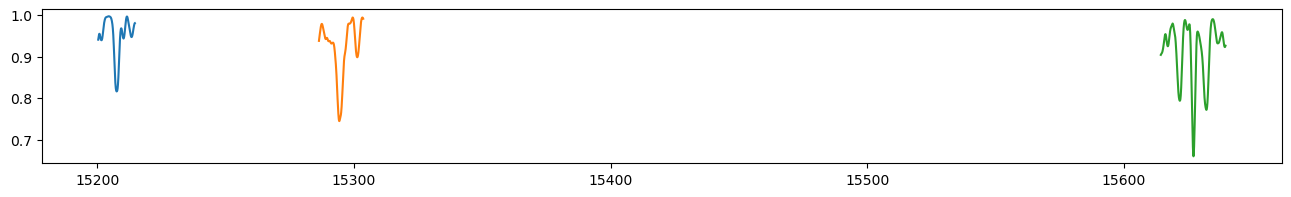

In [4]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False)

# Inversion

In [5]:
solution, inv_spectra, fitness = net.inversion(spectrum, 1024, 10, verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 7.836033061535549e-05
----------------------------
Iteration: 2   Best Fitness: 5.5714166070157696e-05
----------------------------
Iteration: 3   Best Fitness: 4.722694926809253e-05
----------------------------
Iteration: 4   Best Fitness: 4.543111259187218e-05
----------------------------
Iteration: 5   Best Fitness: 3.901164465037768e-05
----------------------------
Iteration: 6   Best Fitness: 2.5496492402389873e-05
----------------------------
Iteration: 7   Best Fitness: 2.1884915778861115e-05
----------------------------
Iteration: 8   Best Fitness: 2.0903230022860642e-05
----------------------------
Iteration: 9   Best Fitness: 1.7479462220559384e-05
----------------------------
Iteration: 10   Best Fitness: 1.679003765474417e-05
----- End PSO -----
Best Fitness: 1.679003765474417e-05

| Teff    | Logg   | M/H    | Bfield  | Vsini   |
| 3571.67 | 3.78   | 0.32   | 3.71    | 13.92   |
        


## Plot observed versus inversion spectra solution

<Axes: >

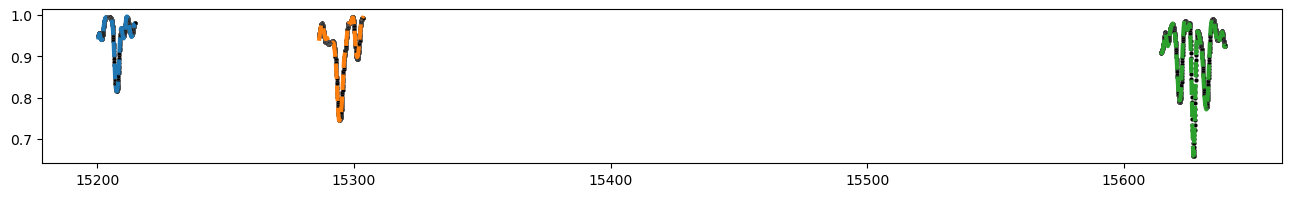

In [6]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False, linewidth=3, linestyle='--')
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra, s=10, linewidth=0.1, color='black')

# Make new objective function

In [7]:
from sklearn.metrics import mean_absolute_error
def obj(y_true, y_pred):
    return mean_absolute_error(y_true.T, y_pred.T, multioutput='raw_values')

In [8]:
solution, inv_spectra, fitness = net.inversion(spectrum, 1024, 10, objective_function=obj, verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 0.009352533994577944
----------------------------
Iteration: 2   Best Fitness: 0.0077484930064069275
----------------------------
Iteration: 3   Best Fitness: 0.0045424467647946255
----------------------------
Iteration: 4   Best Fitness: 0.003081364210802885
----------------------------
Iteration: 5   Best Fitness: 0.002513304733526673
----------------------------
Iteration: 6   Best Fitness: 0.002263625444893875
----------------------------
Iteration: 7   Best Fitness: 0.0014152808452266262
----------------------------
Iteration: 8   Best Fitness: 0.0014152808452266262
----------------------------
Iteration: 9   Best Fitness: 0.0013402330507444819
----------------------------
Iteration: 10   Best Fitness: 0.0009480264645072958
----- End PSO -----
Best Fitness: 0.0009480264645072958

| Teff    | Logg   | M/H    | Bfield  | Vsini   |
| 3570.66 | 3.41   | 0.19   | 3.66    | 14.31   |
        


## Plot observed versus inversion spectra solution

<Axes: >

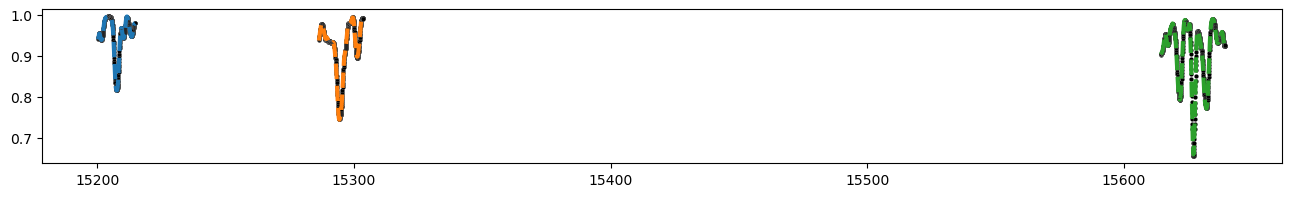

In [9]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False, linewidth=3, linestyle='--')
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra, s=10, linewidth=0.1, color='black')

# Inversion with fixed parameters

In [10]:
solution, inv_spectra, fitness = net.inversion(spectrum, 1024, 10, fixed_logg=3.12, fixed_vsini=13.78, verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 9.415024505273301e-05
----------------------------
Iteration: 2   Best Fitness: 1.2138987339450844e-05
----------------------------
Iteration: 3   Best Fitness: 1.2138987339450844e-05
----------------------------
Iteration: 4   Best Fitness: 8.239511780636975e-06
----------------------------
Iteration: 5   Best Fitness: 7.157081761769181e-06
----------------------------
Iteration: 6   Best Fitness: 6.264750059958483e-06
----------------------------
Iteration: 7   Best Fitness: 6.2352575598324955e-06
----------------------------
Iteration: 8   Best Fitness: 6.2352575598324955e-06
----------------------------
Iteration: 9   Best Fitness: 6.2352575598324955e-06
----------------------------
Iteration: 10   Best Fitness: 6.22954805811024e-06
----- End PSO -----
Best Fitness: 6.22954805811024e-06

| Teff    | Logg   | M/H    | Bfield  | Vsini   |
| 3594.52 | 3.12   | 0.07   | 3.64    | 13.78   |
        


## Plot observed versus inversion spectra solution

<Axes: >

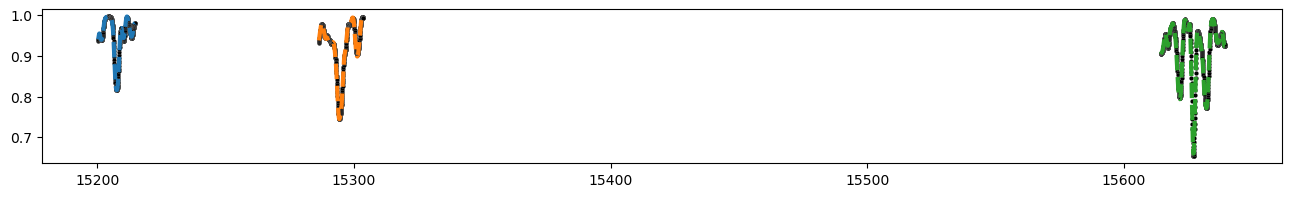

In [11]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False, linewidth=3, linestyle='--')
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra, s=10, linewidth=0.1, color='black')

# Inversion with range in params (teff,logg,mh,bfield,vsini)

In [12]:
solution, inv_spectra, fitness = net.inversion(spectrum, 1024, 10, teff_range=(3000,5000), vsini_range=(15,35), verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 0.00019606450083285256
----------------------------
Iteration: 2   Best Fitness: 7.903988003970088e-05
----------------------------
Iteration: 3   Best Fitness: 4.4673250214829945e-05
----------------------------
Iteration: 4   Best Fitness: 2.1583271547991585e-05
----------------------------
Iteration: 5   Best Fitness: 1.9549198451362648e-05
----------------------------
Iteration: 6   Best Fitness: 6.2292641350967064e-06
----------------------------
Iteration: 7   Best Fitness: 4.278847470403898e-06
----------------------------
Iteration: 8   Best Fitness: 4.278847470403898e-06
----------------------------
Iteration: 9   Best Fitness: 4.163934372918819e-06
----------------------------
Iteration: 10   Best Fitness: 3.872901698023932e-06
----- End PSO -----
Best Fitness: 3.872901698023932e-06

| Teff    | Logg   | M/H    | Bfield  | Vsini   |
| 3569.85 | 3.47   | 0.22   | 3.6    | 15.2   |
        


## Plot observed versus inversion spectra solution

<Axes: >

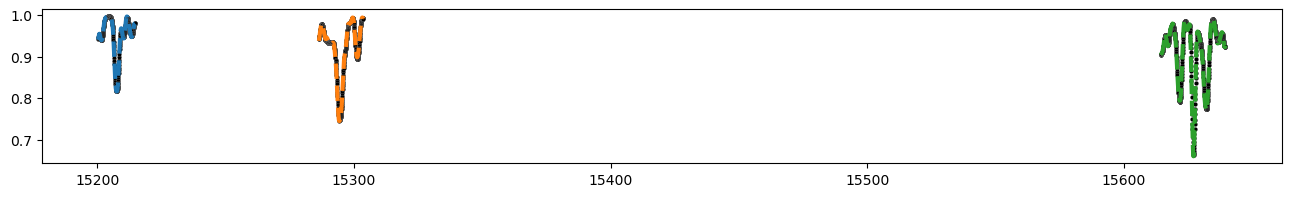

In [13]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False, linewidth=3, linestyle='--')
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra, s=10, linewidth=0.1, color='black')

# Inversion with filling factor on magnetic field

In [14]:
# need to fix teff, logg, mh, vsini
# fixed_bfields are the steps on magnetic field, each one is associated with one filling factor
solution, inv_spectra, fitness = net.mag_filling_factor_inversion(spectrum, 1024, 10, fixed_teff=3600, fixed_logg=3.25, fixed_mh=0.15, fixed_vsini=15, fixed_bfields=[0,2,4,6,8,10,12], verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 3.091285781136021e-05
----------------------------
Iteration: 2   Best Fitness: 2.367156922611904e-05
----------------------------
Iteration: 3   Best Fitness: 1.946072443048039e-05
----------------------------
Iteration: 4   Best Fitness: 1.5493859728113704e-05
----------------------------
Iteration: 5   Best Fitness: 1.5493859728113704e-05
----------------------------
Iteration: 6   Best Fitness: 1.5493859728113704e-05
----------------------------
Iteration: 7   Best Fitness: 1.5493859728113704e-05
----------------------------
Iteration: 8   Best Fitness: 1.5493859728113704e-05
----------------------------
Iteration: 9   Best Fitness: 1.5493859728113704e-05
----------------------------
Iteration: 10   Best Fitness: 1.5493859728113704e-05
----- End PSO -----
Best Fitness: 1.5493859728113704e-05
[0.19649078 0.22509341 0.45967113 0.1050982  0.00875216 0.00254701
 0.0023473 ]


## Plot observed versus inversion spectra solution

<Axes: >

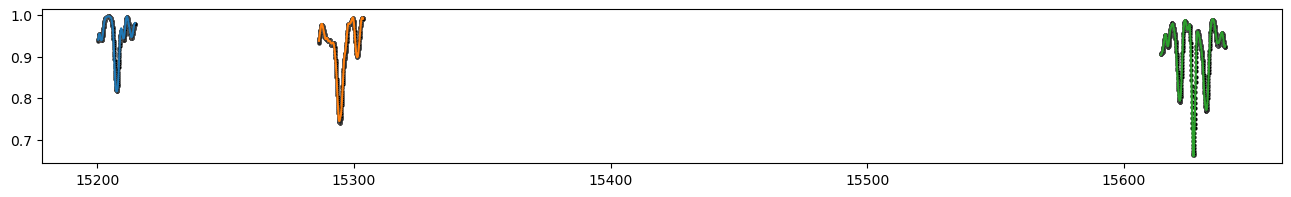

In [15]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False)
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra, s=10, linewidth=0.1, color='black')